In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
sns.set(font='Arial')

In [23]:
df = pd.read_csv('..\\data\\pareto\\avg_price_act.csv',index_col=0)
df=df.join(pd.read_csv('..\\data\\pareto\\avg_price_sa.csv',index_col=0))

df.index=df.index.rename('Date')
df.index=pd.DatetimeIndex(df.index)

<AxesSubplot:title={'center':'Avg Price'}, xlabel='Date'>

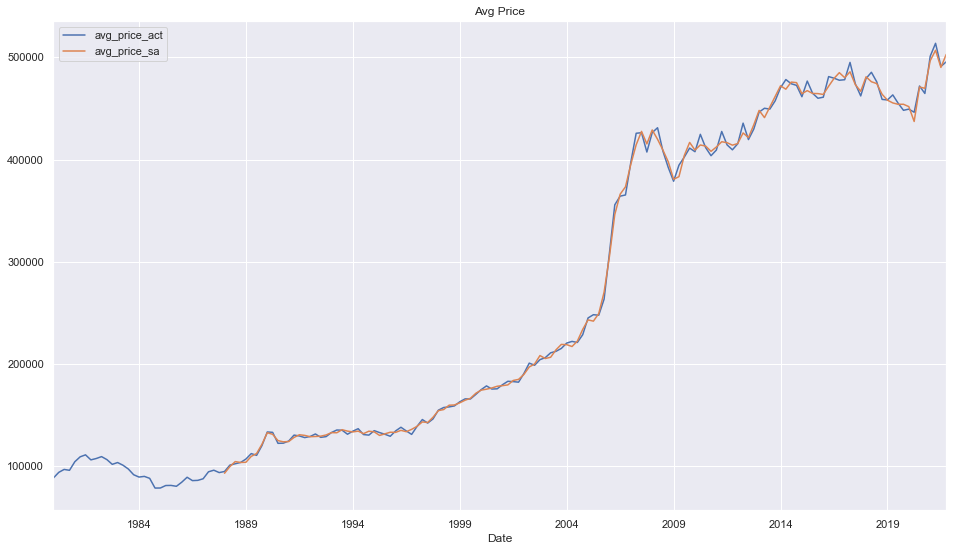

In [24]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,9))

df[['avg_price_act','avg_price_sa']].plot(ax=ax,title='Avg Price')


In [25]:
real_income = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='RealDisposableIncome',engine='openpyxl',index_col=0)[['AB']]
real_income.rename({'AB':'RealDisposableIncome'},axis=1,inplace=True)

real_gdp = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='RealGDP',engine='openpyxl',index_col=0)[['AB']]
real_gdp.rename({'AB':'RealGDP'},axis=1,inplace=True)

unemp = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='Unemployment',engine='openpyxl',index_col=0)[['AB']]
unemp.rename({'AB':'Unemployment'},axis=1,inplace=True)

employment = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='Employment',engine='openpyxl',index_col=0)[['AB']]
employment.rename({'AB':'Employment'},axis=1,inplace=True)

cpi = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='CPI',engine='openpyxl',index_col=0,header=1)[['AB']]
cpi.rename({'AB':'CPI'},axis=1,inplace=True)

prov_econ=real_gdp.join(real_income)
prov_econ=prov_econ.join(unemp)
prov_econ=prov_econ.join(employment)
prov_econ=prov_econ.join(cpi)
prov_econ.index=prov_econ.index.rename('Date')
prov_econ.index=pd.PeriodIndex(prov_econ.index,freq='Q').to_timestamp()


In [26]:
df['avg_price_sa_log'] =np.log(df['avg_price_sa'])

In [32]:
df['avg_price_sa_log_diff']=df['avg_price_sa_log'].diff()

In [34]:
nat_econ=pd.read_excel('../data/BaselineNationalForecasts.xlsx',header=1,index_col=0,engine='openpyxl',sheet_name='Quarterly')[3:-11]
energy = pd.read_excel('../data/BaselineNationalForecasts.xlsx',sheet_name='Energy',header=0,index_col=0,engine='openpyxl')
covid = pd.read_excel('../data/BaselineNationalForecasts.xlsx',sheet_name='COVID',header=0,index_col=0,engine='openpyxl')

In [35]:
nat_econ.index = nat_econ.index.str.replace(' ','')
nat_econ.index=nat_econ.index.rename('Date')
nat_econ.index=pd.PeriodIndex(nat_econ.index,freq='Q').to_timestamp()
energy.index = energy.index.str.replace(' ','')
energy.index=energy.index.rename('Date')
energy.index=pd.PeriodIndex(energy.index,freq='Q').to_timestamp()
covid.index = covid.index.str.replace(' ','')
covid.index=covid.index.rename('Date')
covid.index=pd.PeriodIndex(covid.index,freq='Q').to_timestamp()


In [37]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'mean error':me, 'mae': mae, 
            'mean percentage error': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})
        

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

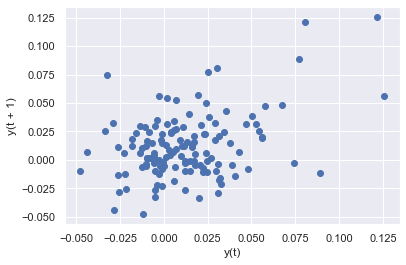

In [38]:
pd.plotting.lag_plot(df['avg_price_sa_log_diff']['1988':])
